# Project 2 - Supervised Machine Learning: Regression

This notebook is for the final project required for the IBM Machine Learning Certificate.

Data Source: 

The main objective of this analysis is to predict the temperature of the Permanet Magnet Synchronous Motor using Linear Regression Methods

Notebook Contents:

>1. Train test split<br>

>2. Simple EDA<br>
Descriptive statistics and data cleaning<br>
Numerical features<br>

>3. Model variations<br>
Square Root Transformation<br>
Standard Scaling<br>
Adding Polynomial Features

>4. Cross-validation and Regularization<br>
Linear Regression<br>
Lasso Regression (L1)<br>
Ridge Regression (L2)<br>
Elastic Net Regression (L1 + L2)<br>
Comparing the metrics

>5. Predict on the test set<br>
Scatter plots of the models<br>


## 1. Train test split

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn_pandas import DataFrameMapper, gen_features
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

pd.options.mode.chained_assignment = None

In [37]:
# Loads in the dataset

data = pd.read_csv('D:\Downloads\ML/Data/data1.csv')

In [38]:
# Prints out the data shape

data.shape

(1330816, 13)

In [39]:
# Drops duplicates and checks the new data shape

data = data.drop_duplicates(keep='first').reset_index(drop=True)
data.shape

(1330816, 13)

In [40]:
# Splits the data into training & validation set and test set

train_and_val, test = train_test_split(data, test_size=0.2, random_state=0)

print(f'Training and validation set size: {train_and_val.shape}')
print(f'Test set size: {test.shape}')

Training and validation set size: (1064652, 13)
Test set size: (266164, 13)


In [41]:
# Splits the data into training set and validation set

train, val = train_test_split(train_and_val, test_size=0.25, random_state=0)

print(f'Training set size: {train.shape}')
print(f'Validation set size: {val.shape}')

Training set size: (798489, 13)
Validation set size: (266163, 13)


## 2. Simple EDA
### Descriptive statistics and data cleaning

In [42]:
# Prints out the first 5 rows of the Training set

train_and_val.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
518201,131.257462,18.310116,28.015976,-0.789087,29.026979,2749.972412,-1.993621,1.070285,37.433559,25.584663,24.285755,-7.633296e-01,20
973445,33.250309,34.077227,124.777487,-83.956112,93.177789,1182.075902,-128.314847,250.152208,72.826057,69.441522,26.579551,2.067230e+02,56
796537,113.889518,48.872678,76.591613,65.166926,67.525047,3789.375269,-74.824271,-53.050000,69.623646,58.941572,24.903314,-4.509890e+01,80
856773,-0.536067,23.508814,27.940628,3.207227,26.384512,-0.001558,-2.000818,1.096774,53.151438,25.934364,26.326882,3.973710e-244,70
1255822,75.206512,22.719739,65.962606,-15.570187,59.447311,1597.517676,-4.692767,25.910944,72.521921,45.986228,26.362530,1.714477e+01,52


In [43]:
# Info about the Training set 

train_and_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064652 entries, 518201 to 305711
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1064652 non-null  float64
 1   coolant         1064652 non-null  float64
 2   stator_winding  1064652 non-null  float64
 3   u_d             1064652 non-null  float64
 4   stator_tooth    1064652 non-null  float64
 5   motor_speed     1064652 non-null  float64
 6   i_d             1064652 non-null  float64
 7   i_q             1064652 non-null  float64
 8   pm              1064652 non-null  float64
 9   stator_yoke     1064652 non-null  float64
 10  ambient         1064652 non-null  float64
 11  torque          1064652 non-null  float64
 12  profile_id      1064652 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 113.7 MB


In [44]:
# Basic statistics about the Training set

train_and_val.describe()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
count,1.064652e+06,1.064652e+06,1.064652e+06,1.064652e+06,1.064652e+06,1.064652e+06,1.064652e+06,1.064652e+06,1.064652e+06,1.064652e+06,1.064652e+06,1.064652e+06,1.064652e+06
mean,5.430227e+01,3.622106e+01,6.633221e+01,-2.515550e+01,5.687034e+01,2.203227e+03,-6.873222e+01,3.742712e+01,5.850948e+01,4.817911e+01,2.456467e+01,3.112005e+01,4.078817e+01
std,4.418797e+01,2.178402e+01,2.866439e+01,6.308688e+01,2.294645e+01,1.860042e+03,6.493650e+01,9.213795e+01,1.900219e+01,1.998491e+01,1.930522e+00,7.710337e+01,2.504565e+01
min,-2.529093e+01,1.062375e+01,1.858582e+01,-1.315304e+02,1.813398e+01,-2.755491e+02,-2.780036e+02,-2.934268e+02,2.085696e+01,1.807669e+01,8.783478e+00,-2.464511e+02,2.000000e+00
25%,1.207061e+01,1.869816e+01,4.278546e+01,-7.864394e+01,3.840739e+01,3.170918e+02,-1.154399e+02,1.095863e+00,4.316107e+01,3.196456e+01,2.318436e+01,-1.370277e-01,1.700000e+01
50%,4.894062e+01,2.689495e+01,6.511010e+01,-7.476147e+00,5.603202e+01,1.999977e+03,-5.114554e+01,1.577402e+01,6.025968e+01,4.562267e+01,2.479738e+01,1.086244e+01,4.300000e+01
75%,9.015661e+01,4.985583e+01,8.812294e+01,1.469237e+00,7.556308e+01,3.764176e+03,-2.979704e+00,1.005434e+02,7.200265e+01,6.144684e+01,2.621730e+01,9.134096e+01,6.500000e+01
max,1.330370e+02,1.015985e+02,1.413629e+02,1.314698e+02,1.119464e+02,6.000015e+03,5.189670e-02,3.017079e+02,1.136002e+02,1.011480e+02,3.069054e+01,2.610057e+02,8.100000e+01


In [45]:
# Remove profile_id column

train_eda = train_and_val.drop(['profile_id'], axis=1)

In [46]:
# Determine columns by data types

num_mask = (train_eda.dtypes == np.float64) | (train_eda.dtypes == np.int64)
num_cols = train_eda.columns[num_mask].tolist()

print(f'Numerical columns: {num_cols}')

Numerical columns: ['u_q', 'coolant', 'stator_winding', 'u_d', 'stator_tooth', 'motor_speed', 'i_d', 'i_q', 'pm', 'stator_yoke', 'ambient', 'torque']


### Numerical features

In [47]:
# Plotting function

def plot_hist(data: pd.DataFrame,
              rows: int,
              cols: int,
              figsize: tuple):

    """ Returns multiple histograms as subplots """
    fig, axes = plt.subplots(rows,cols, figsize=figsize)
    for i, ax in enumerate(axes.flatten()):
        if i < len(data.columns):
            data[sorted(data.columns)[i]].plot.hist(bins=30, ax=ax)
            ax.set_title(f'{sorted(data.columns)[i]} distribution')
            ax.tick_params(axis='x')
            ax.tick_params(axis='y')
            ax.get_yaxis().get_label().set_visible(False)
        else:
            fig.delaxes(ax=ax)
    fig.tight_layout()

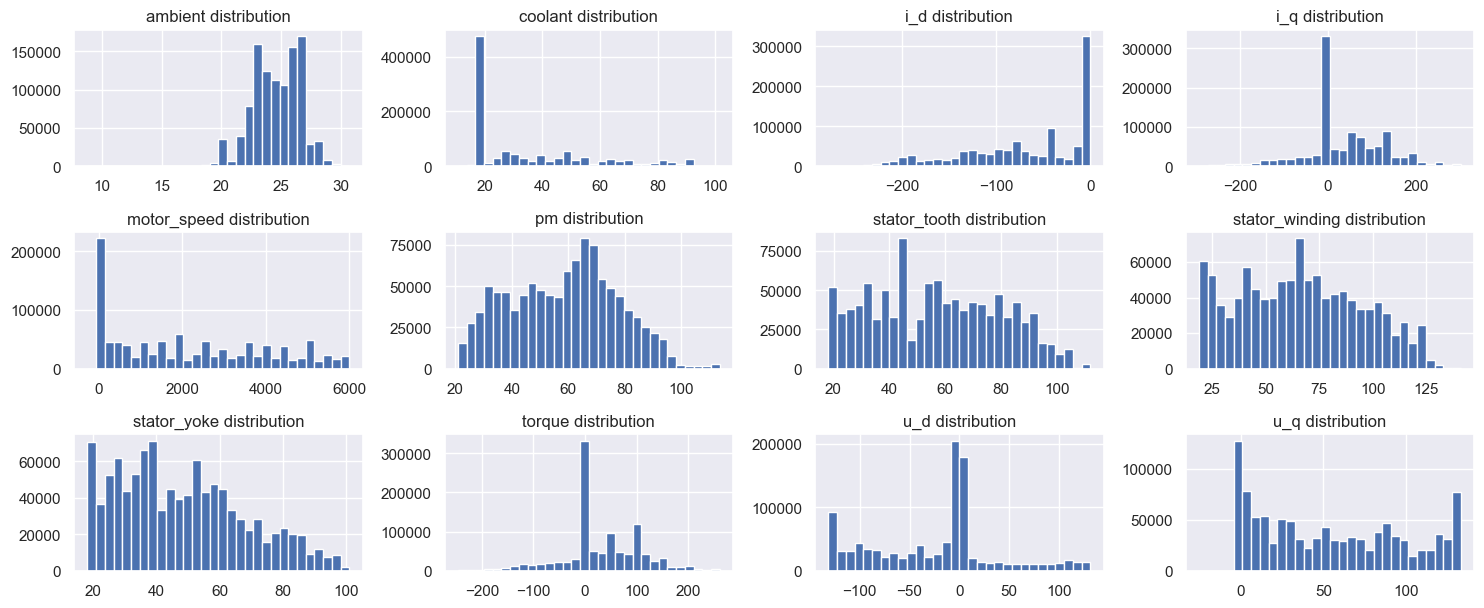

In [48]:
# Ploting all numerical features

plot_hist(data=train_eda[num_cols],
          rows=4,
          cols=4,
          figsize=(15,8))

In [49]:
def check_skew(data: pd.DataFrame, limit: float) -> pd.DataFrame:
    skew_vals = data.skew()

    skew_cols = (skew_vals
                 .sort_values(ascending=False)
                 .to_frame('Skew')
                 .query('abs(Skew) > {}'.format(limit))
    )

    return skew_cols

In [50]:
# Checking the skewness of all numerical features.

skew_cols = check_skew(train_eda[num_cols], 0.75)
skew_cols

,Skew
coolant,1.049126


In [51]:
# Applying Square Root Transformation on predictor features

train_sqrt = train_eda[num_cols].drop('pm', axis=1).copy()
for col in list(skew_cols.index):
    if col != 'pm':
        train_sqrt[col] = train_sqrt[col].apply(np.sqrt)

In [52]:
# Checking skewness after tranformation

check_skew(train_sqrt, 0)

,Skew
coolant,0.782500
stator_yoke,0.481250
motor_speed,0.385287
u_q,0.314311
stator_winding,0.167720
u_d,0.145709
stator_tooth,0.137759
torque,-0.126100
i_q,-0.145379
ambient,-0.349677


In [53]:
def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [54]:
# Calculating VIF

calc_vif(train_sqrt)

,variables,VIF
0,u_q,13.222192
1,coolant,354.939287
2,stator_winding,1265.088181
3,u_d,5.558063
4,stator_tooth,4771.138326
5,motor_speed,35.308645
6,i_d,22.011325
7,i_q,299.570622
8,stator_yoke,2087.857618
9,ambient,106.619720


## 3. Model variations

In [55]:
# Cleaning the data

train_clean = train.drop(['profile_id'], axis=1)
val_clean = val.drop(['profile_id'], axis=1)

In [56]:
# Spliting the data

X_train, X_val = train_clean.drop("pm", axis=1), val_clean.drop("pm", axis=1)
y_train, y_val = train_clean["pm"], val_clean["pm"]

### Linear Regression

In [57]:
# Fitting test set data & predicting

LR = LinearRegression()
LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_val)

In [58]:
# Calculating RMSE Scores

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_val, y_test_pred))

scores = {
    'Model': "LR",
    'Number of features': X_train.shape[1],
    'RMSE train': rmse_train,
    'RMSE test': rmse_test
}

In [59]:
# Blank error list

error_df = [] 

In [60]:
# Prints out error table

error_df = pd.DataFrame.from_dict([scores])
error_df

,Model,Number of features,RMSE train,RMSE test
0,LR,11,7.244084,7.236403


### Square Root Transformation

In [61]:
# Applying Square Root Transformation for skewed features

X_train['coolant'] = X_train['coolant'].apply(np.sqrt)
X_val['coolant'] = X_val['coolant'].apply(np.sqrt)

In [62]:
# Fitting test set data & predicting

LR = LinearRegression()
LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_val)

In [63]:
# Calculating RMSE Scores
 
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_val, y_test_pred))

scores = {
    'Model': 'LR + SRT',
    'Number of features': X_train.shape[1],
    'RMSE train': rmse_train,
    'RMSE test': rmse_test
}

In [64]:
# Prints out error table

error_df = error_df.append([scores], ignore_index=True)
error_df

C:\Users\qasim\AppData\Local\Temp\ipykernel_3932\575228604.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  error_df = error_df.append([scores], ignore_index=True)


,Model,Number of features,RMSE train,RMSE test
0,LR,11,7.244084,7.236403
1,LR + SRT,11,7.255041,7.247472


### Standard Scaling

In [65]:
# Scaling features in the traning set and transforming the test set

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [66]:
# Fitting test set data & predicting

LR = LinearRegression()
LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_val)

In [67]:
# Calculating RMSE Scores

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_val, y_test_pred))

scores = {
    'Model': 'LR + SRT + SCALED',
    'Number of features': X_train.shape[1],
    'RMSE train': rmse_train,
    'RMSE test': rmse_test
}

In [68]:
# Prints out error table

error_df = error_df.append([scores], ignore_index=True)
error_df

C:\Users\qasim\AppData\Local\Temp\ipykernel_3932\575228604.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  error_df = error_df.append([scores], ignore_index=True)


,Model,Number of features,RMSE train,RMSE test
0,LR,11,7.244084,7.236403
1,LR + SRT,11,7.255041,7.247472
2,LR + SRT + SCALED,11,7.255041,7.247472


### Polynomial Features

In [69]:
# Fitting Polynomial features to the traning set and transforming the test set

for degree in range(1,3):

    PF = PolynomialFeatures(degree=degree, include_bias=False)

    X_train = PF.fit_transform(X_train)
    X_val = PF.transform(X_val)


    # Fitting test set data & predicting

    LR = LinearRegression()
    LR.fit(X_train, y_train)
    y_train_pred = LR.predict(X_train)
    y_test_pred = LR.predict(X_val)


    # Calculating RMSE Scores

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_val, y_test_pred))

    scores = {
        'Model': 'LR + SRT + SCALED + PF ' + str(degree),
        'Number of features': X_train.shape[1],
        'RMSE train': rmse_train,
        'RMSE test': rmse_test
    }

    error_df = error_df.append([scores], ignore_index=True)

C:\Users\qasim\AppData\Local\Temp\ipykernel_3932\878202348.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  error_df = error_df.append([scores], ignore_index=True)
C:\Users\qasim\AppData\Local\Temp\ipykernel_3932\878202348.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  error_df = error_df.append([scores], ignore_index=True)


In [70]:
# Prints out error table
 
error_df

,Model,Number of features,RMSE train,RMSE test
0,LR,11,7.244084,7.236403
1,LR + SRT,11,7.255041,7.247472
2,LR + SRT + SCALED,11,7.255041,7.247472
3,LR + SRT + SCALED + PF 1,11,7.255041,7.247472
4,LR + SRT + SCALED + PF 2,77,6.074094,6.067513


## 4. Cross-Validation and Regularization

In [71]:
# Cleaning the data

train_and_val_clean = train_and_val.drop(['profile_id'], axis=1)

In [72]:
# Spliting the data

X = train_and_val.drop('pm', axis=1)
y = train_and_val['pm']

In [73]:
# 5-fold Cross Validation

kf = KFold(shuffle=True, random_state=0, n_splits=5)

In [74]:
# Create a class for the data pipeline
class XPipe:
    # Skewed features observed from the EDA
    skew_cols = ['coolant']

    def __init__(self, X):
        self.num_cols = X.select_dtypes(exclude=['object']).columns.tolist()
        

    def sqrt_trans(self, num_values):

        """ Applies square root transformation to skewed features"""

        num_df = pd.DataFrame(num_values, columns=self.num_cols)
        num_df[XPipe.skew_cols] = num_df[XPipe.skew_cols].apply(np.sqrt)
        
        return num_df.values

    def model_pipe(self, model, degree=2):

        """ Returns a data pipeline"""

        
        mapper = DataFrameMapper([  
            (self.num_cols, [FunctionTransformer(self.sqrt_trans),
                             StandardScaler(),
                             PolynomialFeatures(degree=degree, include_bias=False)])
        ])

        return make_pipeline(mapper, model)

In [75]:
XPipe(X).model_pipe(LinearRegression())

Pipeline(steps=[('dataframemapper',
                 DataFrameMapper(drop_cols=[],
                                 features=[(['u_q', 'coolant', 'stator_winding',
                                             'u_d', 'stator_tooth',
                                             'motor_speed', 'i_d', 'i_q',
                                             'stator_yoke', 'ambient', 'torque',
                                             'profile_id'],
                                            [FunctionTransformer(func=<bound method XPipe.sqrt_trans of <__main__.XPipe object at 0x0000020A064464A0>>),
                                             StandardScaler(),
                                             PolynomialFeatures(include_bias=False)])])),
                ('linearregression', LinearRegression())])

In [76]:
# Create a blank dictionary to store metrics of different models

metrics = {}

### Linear Regression

In [ ]:
# Blank dictionary to add in metrics

lr_scores = {}

In [77]:
# Iterate over different degree 1 and 2

for d in list(range(1,3)):
    score = cross_val_score(XPipe(X)
                            .model_pipe(LinearRegression(), degree=d),
                            X, y, cv=kf, scoring='neg_mean_squared_error')
    lr_scores[f'Degree = {d}'] = np.mean(np.sqrt(-score))


# Creating an error table

lr_rmse = pd.DataFrame.from_dict(lr_scores, orient='index', columns=['Average RMSE']).sort_values('Average RMSE')

d:\Users\qasim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
d:\Users\qasim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
d:\Users\qasim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
d:\Users\qasim\AppData\Local\Programs\Python\Pyth

In [78]:
# Prints the error table

lr_rmse

,Average RMSE
Degree = 2,5.882629
Degree = 1,7.220744


In [79]:
# Calculating average R squared score

lr_r2_scores = cross_val_score(XPipe(X)
                              .model_pipe(LinearRegression(), degree=2),
                              X, y, cv=kf)
lr_r2_scores

d:\Users\qasim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
d:\Users\qasim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
d:\Users\qasim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
d:\Users\qasim\AppData\Local\Programs\Python\Pyth

array([0.90449886, 0.90432977, 0.90311613, 0.90443314, 0.9044261 ])

In [80]:
# Storing the metrics

metrics['Average RMSE'] = [lr_rmse['Average RMSE'].values[0]]
metrics['Average R2'] = [np.mean(lr_r2_scores)]

### Ridge Regression (L2)

In [ ]:
# Blank dictionary to add in metrics

ridge_scores = {}

In [81]:
# Iterate over different alphas

for d in [1, 2]:
    for a in [0.005, 0.01, 0.05, 0.1, 0.3, 1, 3, 5, 10]:
        score = cross_val_score(XPipe(X)
                                .model_pipe(Ridge(alpha=a, max_iter=10000), degree=d),
                                X, y, cv=kf, scoring='neg_mean_squared_error')

                                
        ridge_scores[f'Degree = {d}, alpha = {a}'] = np.mean(np.sqrt(-score))


# Creating an error table

ridge_rmse = pd.DataFrame.from_dict(ridge_scores, orient='index', columns=['Average RMSE']).sort_values('Average RMSE')

d:\Users\qasim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
d:\Users\qasim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
d:\Users\qasim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
d:\Users\qasim\AppData\Local\Programs\Python\Pyth

In [82]:
# Prints the error table

ridge_rmse

,Average RMSE
"Degree = 2, alpha = 0.01",5.882628
"Degree = 2, alpha = 0.005",5.882628
"Degree = 2, alpha = 0.05",5.882643
"Degree = 2, alpha = 0.1",5.882695
"Degree = 2, alpha = 0.3",5.883156
"Degree = 2, alpha = 1",5.885688
"Degree = 2, alpha = 3",5.891282
"Degree = 2, alpha = 5",5.894811
"Degree = 2, alpha = 10",5.901245
"Degree = 1, alpha = 0.01",7.220744


In [83]:
# Calculating average R squared score

ridge_r2_scores = cross_val_score(XPipe(X)
                                  .model_pipe(Ridge(alpha=0.005, max_iter=10000), degree=2),
                                  X, y, cv=kf)
ridge_r2_scores

d:\Users\qasim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
d:\Users\qasim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
d:\Users\qasim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
d:\Users\qasim\AppData\Local\Programs\Python\Pyth

array([0.90449939, 0.90432974, 0.90311615, 0.90443326, 0.90442554])

In [84]:
# Storing the metrics

metrics['Average RMSE'].append(ridge_rmse['Average RMSE'].values[0])
metrics['Average R2'].append(np.mean(ridge_r2_scores))

### Lasso Regression (L1)
Find a combination of alpha and polynomial degree for Lasso regularization

In [ ]:
# Blank dictionary to add in metrics

las_scores = {}

In [85]:
# Iterate over different alphas

for d in [1, 2]:
    for a in [0.005, 0.01, 0.05, 0.1, 0.3, 1, 3, 5, 10]:
        score = cross_val_score(XPipe(X)
                                .model_pipe(Lasso(alpha=a, max_iter=10000), degree=d),
                                X, y, cv=kf, scoring='neg_mean_squared_error')
            
        las_scores[f'Degree = {d}, alpha = {a}'] = np.mean(np.sqrt(-score))


# Creating an error table

las_rmse = pd.DataFrame.from_dict(las_scores, orient='index', columns=['Average RMSE']).sort_values('Average RMSE')

d:\Users\qasim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
d:\Users\qasim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
d:\Users\qasim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
d:\Users\qasim\AppData\Local\Programs\Python\Pyth

In [86]:
# Prints the error table

las_rmse

,Average RMSE
"Degree = 2, alpha = 0.005",6.096484
"Degree = 2, alpha = 0.01",6.251577
"Degree = 2, alpha = 0.05",6.689681
"Degree = 1, alpha = 0.005",7.224930
"Degree = 1, alpha = 0.01",7.237375
"Degree = 2, alpha = 0.1",7.300570
"Degree = 1, alpha = 0.05",7.517443
"Degree = 2, alpha = 0.3",7.561327
"Degree = 1, alpha = 0.1",7.799127
"Degree = 1, alpha = 0.3",8.312517


In [87]:
# Calculating average R squared score

las_r2_scores = cross_val_score(XPipe(X)
                                .model_pipe(Lasso(alpha=0.3, max_iter=10000), degree=2),
                                X, y, cv=kf)
las_r2_scores

d:\Users\qasim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
d:\Users\qasim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
d:\Users\qasim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
d:\Users\qasim\AppData\Local\Programs\Python\Pyth

array([0.84139911, 0.84236386, 0.8407448 , 0.84174397, 0.84204362])

In [88]:
# Store the metrics

metrics['Average RMSE'].append(las_rmse['Average RMSE'].values[0])
metrics['Average R2'].append(np.mean(las_r2_scores))

### Elastic Net Regresstion (L1 + L2)

In [90]:
# Blank dictionary to add in metrics

elasticnet_scores = {}

In [91]:
# Iterate over different alphas

for d in [1, 2]:
    for a in [0.005, 0.01, 0.05, 0.1, 0.3, 1, 3, 5, 10]:
        score = cross_val_score(XPipe(X)
                                .model_pipe(ElasticNet(alpha=a, max_iter=10000), degree=d),
                                X, y, cv=kf, scoring='neg_mean_squared_error')
        elasticnet_scores[f'Degree = {d}, alpha = {a}'] = np.mean(np.sqrt(-score))


# Creating an error table

elasticnet_rmse = pd.DataFrame.from_dict(elasticnet_scores, orient='index', columns=['Average RMSE']).sort_values('Average RMSE')

d:\Users\qasim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
d:\Users\qasim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
d:\Users\qasim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
d:\Users\qasim\AppData\Local\Programs\Python\Pyth

In [92]:
# Prints the error table

elasticnet_rmse

,Average RMSE
"Degree = 2, alpha = 0.005",6.598497
"Degree = 2, alpha = 0.01",6.817648
"Degree = 2, alpha = 0.05",7.311029
"Degree = 2, alpha = 0.1",7.535095
"Degree = 1, alpha = 0.005",7.589773
"Degree = 1, alpha = 0.01",7.738158
"Degree = 2, alpha = 0.3",7.968361
"Degree = 1, alpha = 0.05",8.119616
"Degree = 1, alpha = 0.1",8.378640
"Degree = 2, alpha = 1",8.854058


In [93]:
# Calculating average R squared score

elasticnet_r2_scores = cross_val_score(XPipe(X)
                                       .model_pipe(ElasticNet(alpha=0.005, max_iter=10000), degree=2),
                                       X, y, cv=kf)
elasticnet_r2_scores

d:\Users\qasim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
d:\Users\qasim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
d:\Users\qasim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
d:\Users\qasim\AppData\Local\Programs\Python\Pyth

array([0.87944158, 0.8797004 , 0.87854693, 0.87973215, 0.87966121])

In [94]:
# Store the metrics

metrics['Average RMSE'].append(elasticnet_rmse['Average RMSE'].values[0])
metrics['Average R2'].append(np.mean(elasticnet_r2_scores))

### Compare the metrics

In [95]:
# Creating a comparison table

metrics['Model'] = ['Linear', 'Ridge', 'Lasso', 'Elastic Net']
pd.DataFrame.from_dict(metrics).set_index('Model').sort_values('Average RMSE')

,Average RMSE,Average R2
Model,,
Ridge,5.882628,0.904161
Linear,5.882629,0.904161
Lasso,6.096484,0.841659
Elastic Net,6.598497,0.879416


## 5. Predict on the test set
The four models are used to make predictions on the unseen test set.

In [96]:
train_df, test_df = train.copy(), test.copy()

In [ ]:
# Cleaning the training set

train_df = train_df.drop(['profile_id'], axis=1)

X_train = train_df.drop('pm', axis=1)
y_train = train_df['pm']

In [ ]:
# Cleaning the test set

test_df = test_df.drop(['profile_id'], axis=1)

X_test = test_df.drop('pm', axis=1)
y_test = test_df['pm']

### Scatter plots from four models

d:\Users\qasim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
d:\Users\qasim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
d:\Users\qasim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
d:\Users\qasim\AppData\Local\Programs\Python\Pyth

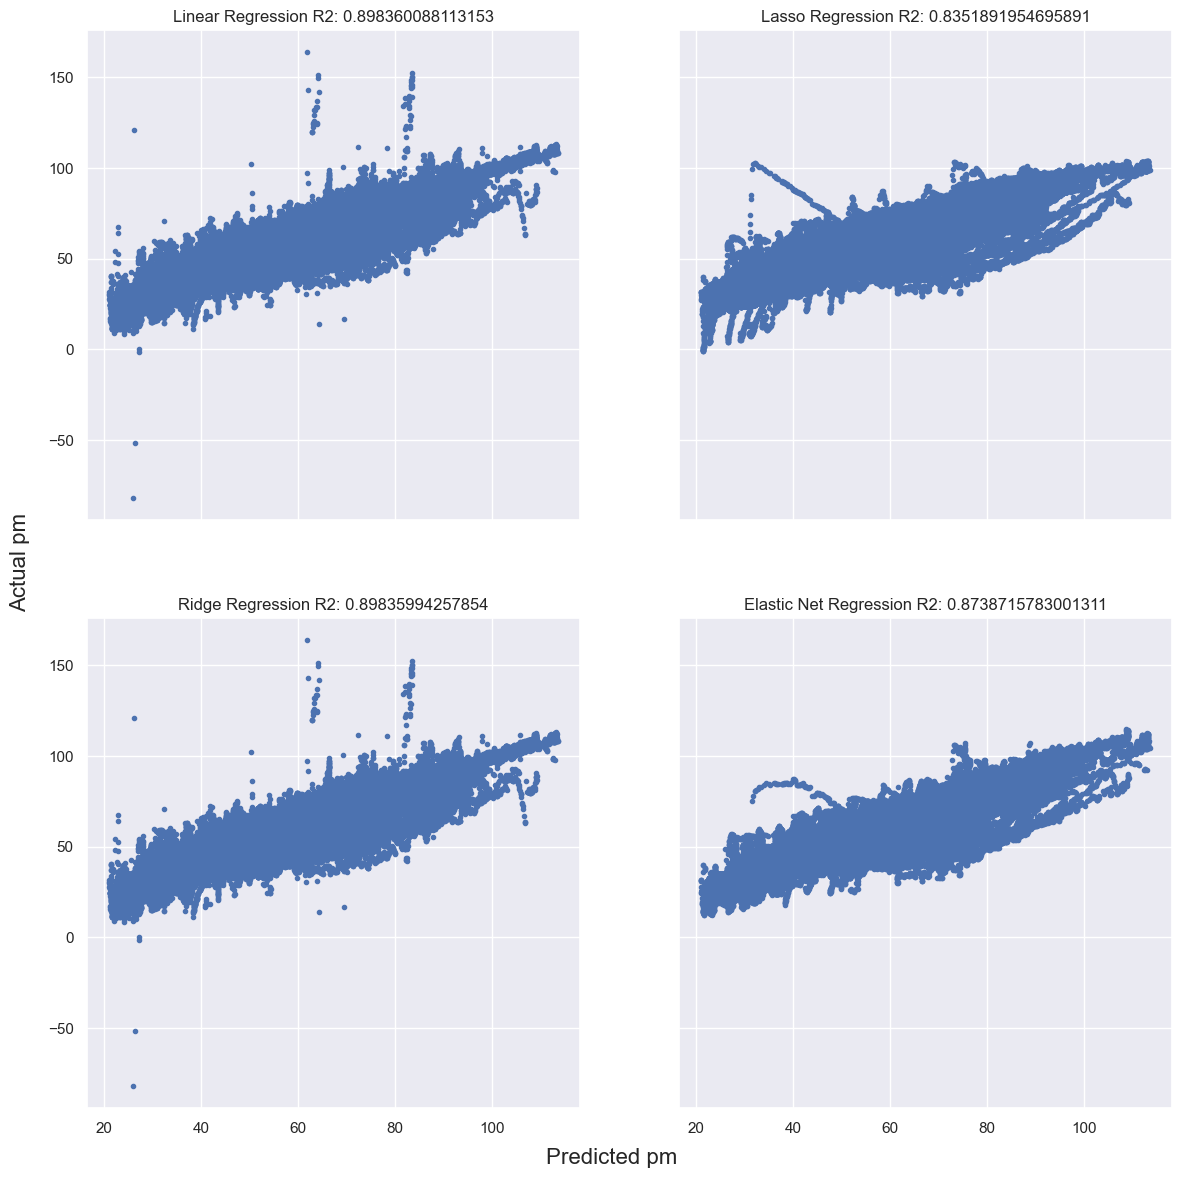

In [ ]:
# Making predictions on the test set and ploting four scatter plots separately

fig, axes = plt.subplots(2,2, figsize=(14,14), sharex=True, sharey=True)
fig.text(0.5, 0.07, 'Predicted pm', ha='center', fontdict={'size': 16})
fig.text(0.07, 0.5, 'Actual pm', va='center', rotation='vertical', fontdict={'size': 16})

models = [LinearRegression(), Lasso(alpha=0.005, max_iter=10000),
          Ridge(alpha=0.01, max_iter=10000), ElasticNet(alpha=0.005, max_iter=10000)]

y_pred_list = []

labels = ['Linear', 'Lasso', 'Ridge', 'Elastic Net']

for i, ax in enumerate(axes.flatten()):
    y_pred = (XPipe(X_train)
              .model_pipe(models[i], degree=2)
              .fit(X_train, y_train)
              .predict(X_test))

    y_pred_list.append(y_pred)

    r_squared = r2_score(y_test, y_pred)

    ax.plot(y_test, y_pred, marker='o', ls='', ms=3.0)
    ax.set(title=f'{labels[i]} Regression R2: {r_squared}')

d:\Users\qasim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
d:\Users\qasim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.407e+06, tolerance: 2.882e+04
  model = cd_fast.enet_coordinate_descent(
d:\Users\qasim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category

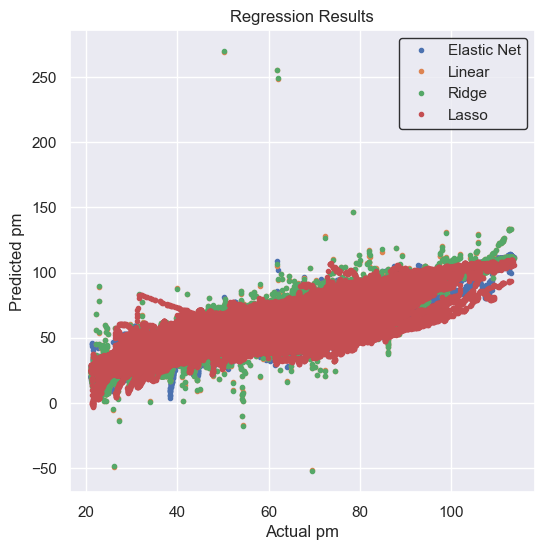

In [ ]:
# Making predictions on the test set and ploting all scatter plots together

fig = plt.figure(figsize=(6,6))
ax = plt.axes()

models = [LinearRegression(), Lasso(alpha=0.005, max_iter=10000),
          Ridge(alpha=0.001, max_iter=10000), ElasticNet(alpha=0.005, max_iter=10000)]
         
labels = ['Linear', 'Lasso', 'Ridge', 'Elastic Net']

for y_pred, lab in zip(y_pred_list, labels):
    ax.plot(y_test, y_pred, marker='o', ls='', ms=3.0, label=lab)

leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual pm', 
       ylabel='Predicted pm', 
       title='Regression Results')

models = [LinearRegression(), Lasso(alpha=0.005, max_iter=10000),
          Ridge(alpha=0.001, max_iter=10000), ElasticNet(alpha=0.005, max_iter=10000)]

labels = ['Linear', 'Lasso', 'Ridge', 'Elastic Net']

for i, label in enumerate(labels):
    y_pred = (XPipe(X_train)
              .model_pipe(models[i], degree=2)
              .fit(X_train, y_train)
              .predict(X_test))
    score = cross_val_score(XPipe(X_train)
                        .model_pipe(models[i], degree=2),
                        X_train, y, cv=kf, scoring='neg_mean_squared_error')
    r_squared = r2_score(y_test, y_pred)

    ax.plot(y_test, y_pred, marker='o', ls='', ms=3.0)
    ax.set(title=f'{labels[i]} Regression R2: {r_squared}')


# Blank dictionary to add in metrics

ridge_scores = {}

# Iterate over different alphas

for d in [1, 2]:
    for a in [0.005, 0.01, 0.05, 0.1, 0.3, 1, 3, 5, 10]:
        score = cross_val_score(XPipe(X)
                                .model_pipe(Ridge(alpha=a, max_iter=10000), degree=d),
                                X, y, cv=kf, scoring='neg_mean_squared_error')

                                
        ridge_scores[f'Degree = {d}, alpha = {a}'] = np.mean(np.sqrt(-score))


# Creating an error table

ridge_rmse = pd.DataFrame.from_dict(ridge_scores, orient='index', columns=['Average RMSE']).sort_values('Average RMSE')

# Storing the metrics

metrics['Average RMSE'].append(ridge_rmse['Average RMSE'].values[0])
metrics['Average R2'].append(np.mean(ridge_r2_scores))

# Blank dictionary to add in metrics

las_scores = {}

# Iterate over different alphas

for d in [1, 2]:
    for a in [0.005, 0.01, 0.05, 0.1, 0.3, 1, 3, 5, 10]:
        score = cross_val_score(XPipe(X)
                                .model_pipe(Lasso(alpha=a, max_iter=10000), degree=d),
                                X, y, cv=kf, scoring='neg_mean_squared_error')
            
        las_scores[f'Degree = {d}, alpha = {a}'] = np.mean(np.sqrt(-score))


# Creating an error table

las_rmse = pd.DataFrame.from_dict(las_scores, orient='index', columns=['Average RMSE']).sort_values('Average RMSE')

# Calculating average R squared score

las_r2_scores = cross_val_score(XPipe(X)
                                .model_pipe(Lasso(alpha=0.3, max_iter=10000), degree=2),
                                X, y, cv=kf)

# Store the metrics

metrics['Average RMSE'].append(las_rmse['Average RMSE'].values[0])
metrics['Average R2'].append(np.mean(las_r2_scores))

# Blank dictionary to add in metrics

elasticnet_scores = {}

# Iterate over different alphas

for d in [1, 2]:
    for a in [0.005, 0.01, 0.05, 0.1, 0.3, 1, 3, 5, 10]:
        score = cross_val_score(XPipe(X)
                                .model_pipe(ElasticNet(alpha=a, max_iter=10000), degree=d),
                                X, y, cv=kf, scoring='neg_mean_squared_error')
        elasticnet_scores[f'Degree = {d}, alpha = {a}'] = np.mean(np.sqrt(-score))


# Creating an error table

elasticnet_rmse = pd.DataFrame.from_dict(elasticnet_scores, orient='index', columns=['Average RMSE']).sort_values('Average RMSE')

# Calculating average R squared score

elasticnet_r2_scores = cross_val_score(XPipe(X)
                                       .model_pipe(ElasticNet(alpha=0.005, max_iter=10000), degree=2),
                                       X, y, cv=kf)
                                       
# Store the metrics

metrics['Average RMSE'].append(elasticnet_rmse['Average RMSE'].values[0])
metrics['Average R2'].append(np.mean(elasticnet_r2_scores))

# Creating a comparison table

metrics['Model'] = ['Linear', 'Ridge', 'Lasso', 'Elastic Net']
pd.DataFrame.from_dict(metrics).set_index('Model').sort_values('Average RMSE')